# Árbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

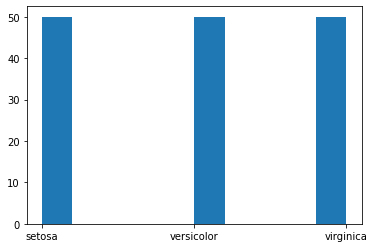

In [4]:
plt.hist(data.Species)
plt.show()

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [7]:
import numpy as np

In [8]:
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75

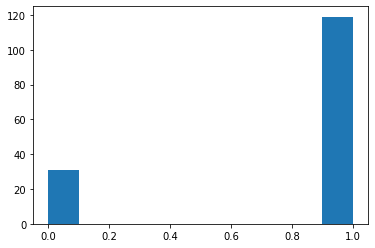

In [9]:
plt.hist(data["is_train"].astype(np.int32))
plt.show()

In [10]:
train, test = data[data["is_train"] == True], data[data["is_train"] == False]

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [13]:
preds = tree.predict(test[predictors])

In [14]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,9,0,0
versicolor,0,11,0
virginica,0,0,11


## Visualización del árbol de decisión

In [15]:
from sklearn.tree import export_graphviz

In [16]:
with open("resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [17]:
import os
from graphviz import Source

In [18]:
file = open("resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Petal.Length <= 2.6\\nentropy = 1.585\\nsamples = 119\\nvalue = [41, 39, 39]"] ;\n1 [label="entropy = 0.0\\nsamples = 41\\nvalue = [41, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 78\\nvalue = [0, 39, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.454\\nsamples = 42\\nvalue = [0, 38, 4]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.65\\nentropy = 0.179\\nsamples = 37\\nvalue = [0, 36, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 36, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.971\\nsamples = 5\\nvalue = [0, 2, 3]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.183\\nsamples = 36\\nvalue = [0, 1, 35]"] ;\n2 -> 8 ;\n9 [label="entro

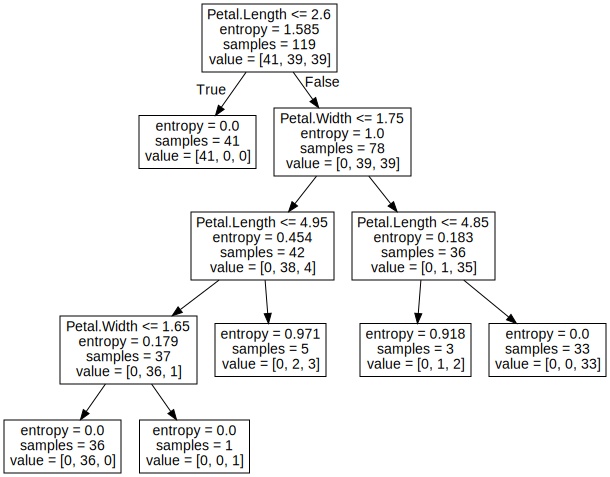

In [19]:
Source(text)

## Cross Validation para la poda

In [20]:
X = data[predictors]
Y = data[target]

In [21]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [22]:
from sklearn.model_selection import KFold, cross_val_score

In [23]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [24]:
scores = np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1))
scores

0.9333333333333333

In [25]:
score = np.mean(scores)
score

0.9333333333333333

In [26]:
for i in range(1, 11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X, Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1))
    score = np.mean(scores)
    print("Score para i =", i, "es de", score)
    print(tree.feature_importances_)

Score para i = 1 es de 0.5666666666666667
[0. 0. 1. 0.]
Score para i = 2 es de 0.9200000000000002
[0.         0.         0.66620285 0.33379715]
Score para i = 3 es de 0.9400000000000001
[0.         0.         0.68976981 0.31023019]
Score para i = 4 es de 0.9333333333333333
[0.         0.         0.66869158 0.33130842]
Score para i = 5 es de 0.9333333333333333
[0.         0.         0.66869158 0.33130842]
Score para i = 6 es de 0.9333333333333333
[0.         0.         0.66869158 0.33130842]
Score para i = 7 es de 0.9333333333333333
[0.         0.         0.66869158 0.33130842]
Score para i = 8 es de 0.9333333333333333
[0.         0.         0.66869158 0.33130842]
Score para i = 9 es de 0.9333333333333333
[0.         0.         0.66869158 0.33130842]
Score para i = 10 es de 0.9333333333333333
[0.         0.         0.66869158 0.33130842]


In [27]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

## Random Forests

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X, Y)

RandomForestClassifier(n_jobs=2, oob_score=True)

In [30]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.94444444, 0.05555556, 0.        ],
       [0.96774194, 0.03225806, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97222222, 0.02777778, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [31]:
forest.oob_score_

0.9466666666666667

Ligeramente superior a la creación de un único árbol